In [3]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import csv
%matplotlib notebook


def read_arduino(ser,inputBufferSize):
#    data = ser.readline(inputBufferSize)
    data = ser.read(inputBufferSize)
    out =[(int(data[i])) for i in range(0,len(data))]
    return out

def process_data(data):
    data_in = np.array(data)
    result = []
    i = 1
    while i < len(data_in)-1:
        if data_in[i] > 127:
            # Found beginning of frame
            # Extract one sample from 2 bytes
            intout = (np.bitwise_and(data_in[i],127))*128
            i = i + 1
            intout = intout + data_in[i]
            result = np.append(result,intout)
        i=i+1
    return result

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [28]:
# use this to find ports
from serial.tools import list_ports

ports = list_ports.comports()
for port in ports:
    print(port)

/dev/cu.HC-05-DevB - n/a
/dev/cu.JustinsAirPods-Wireless - n/a
/dev/cu.BLAST-Port - n/a
/dev/cu.JustinsiPhone-Wirelessi - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodem14101 - Arduino Leonardo


In [315]:
# Read example data
baudrate = 230400
cport = '/dev/cu.usbmodem14101'  # set the correct port before you run it
#cport = "/dev/cu.usbserial-DJ00E2W2"
#cport = '/dev/tty.usbmodem141101'  # set the correct port before run it
ser = serial.Serial(port=cport, baudrate=baudrate)

# take continuous data stream 
inputBufferSize = 10000 # keep betweein 2000-20000
ser.timeout = inputBufferSize/20000.0  # set read timeout, 20000 is one second
#this is the problem line on the mac
# ser.set_buffer_size(rx_size = inputBufferSize)

#%matplotlib notebook

#print(actions)

total_time = 5; # time in seconds [[1 s = 20000 buffer size]]
max_time = 10.0; # time plotted in window [s]
N_loops = 20000.0/inputBufferSize*total_time

T_acquire = inputBufferSize/20000.0    # length of time that data is acquired for 
N_max_loops = max_time/T_acquire    # total number of loops to cover desire time window

#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
#plt.ion()
#fig.show()
#fig.canvas.draw()

count = 0

print("go")
for k in range(0,int(N_loops)):
    data = read_arduino(ser,inputBufferSize)
    data_temp = process_data(data)
    if k==0:
        data_plot = data_temp
    else:
        data_plot = np.append(data_plot,data_temp) 
    t = (min(k+1,N_loops))*inputBufferSize/20000.0*np.linspace(0,1,(data_plot).size)
    
#    plt.xlim([0,max_time])
#    ax1.clear()
#    ax1.set_xlim(0, max_time)
#    plt.xlabel('time [s]')
#    ax1.plot(t,data_plot)
#    fig.canvas.draw()    
#    plt.show()

# close serial port if necessary
if ser.read():
    ser.flushInput()
    ser.flushOutput()
    ser.close()

go


[510.573 510.564 510.555 ... 514.061 514.061 514.062]


<IPython.core.display.Javascript object>


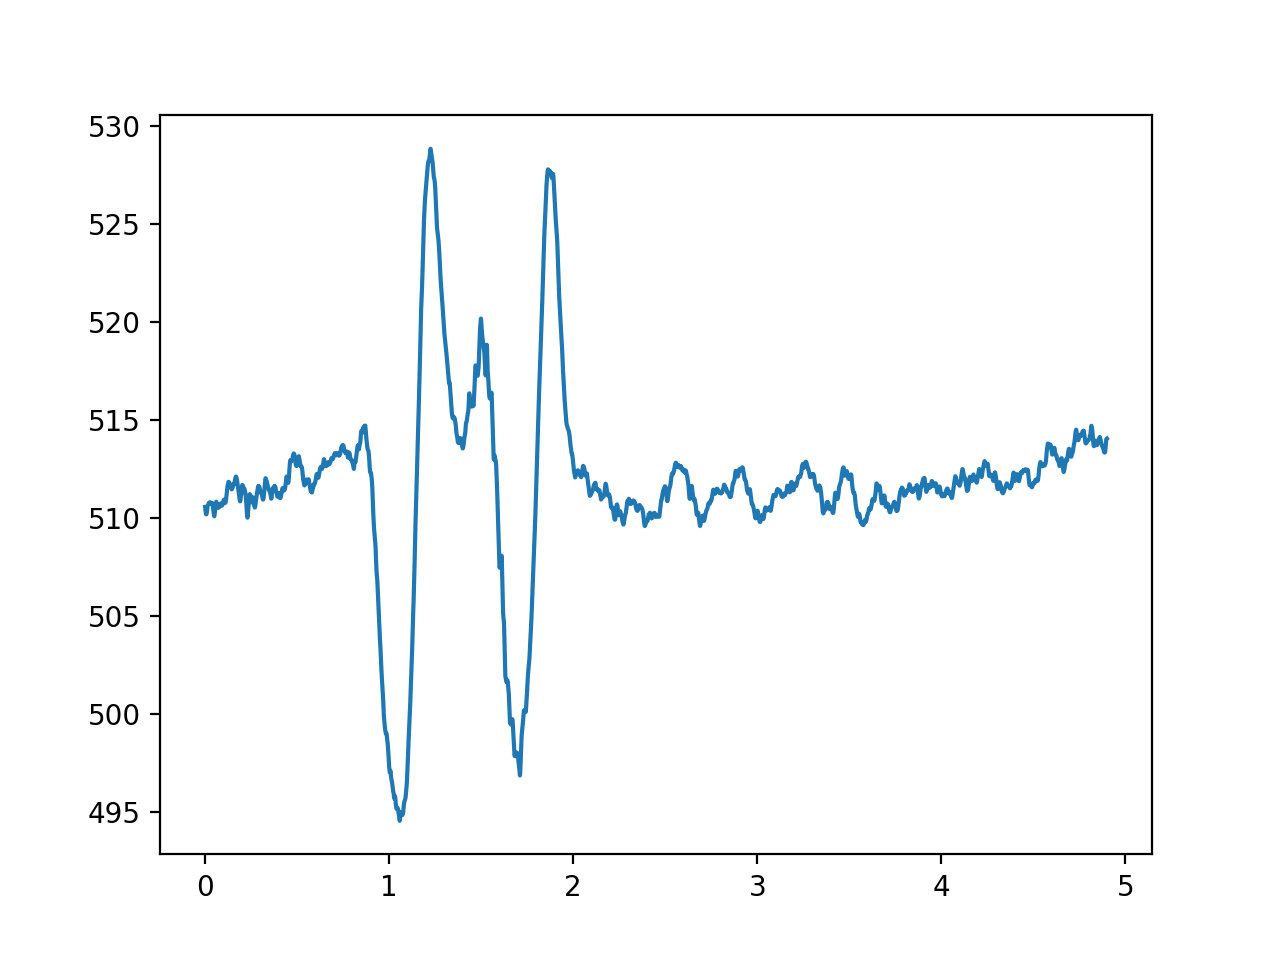

In [316]:
filtered = moving_average(data_plot,1000)            #MOVING AVERAGE DATA
print(filtered)
filtlength = len(filtered)

indices2 = np.arange(1,filtlength+1,1)#UPDATE INDICES FOR MOVING AVERAGE
time = indices2 / 10000
fig = plt.figure         #PLOT MOVING AVERAGE
plt.plot(time,filtered)
plt.show()

In [317]:
np.savetxt('doubleblink10.dat', data_plot)